In [2]:
import pandas as pd
data=pd.read_csv("AirPassengers.csv")
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
data.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [4]:
data.columns=["months","passengers"]

In [6]:
data.head()

,months,passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [7]:
data["months"]=pd.to_datetime(data["months"])

In [8]:
data.head()

,months,passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [9]:
data.set_index('months',inplace=True)

In [10]:
data.head()

,passengers
months,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='months'>

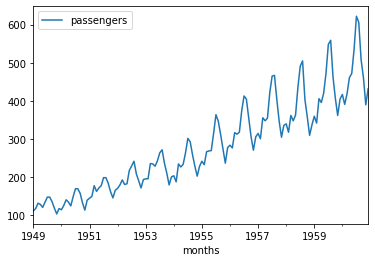

In [11]:
data.plot()

In [12]:
#Augmented Dickey-Fuller Test (adfuller)
'''The time series is considered stationary if the p-value is low (according to the null hypothesis) 
and the critical values at 1%, 5%, 10% confidence 
intervals are as close as possible to the ADF Statistics.'''

'The time series is considered stationary if the p-value is low (according to the null hypothesis) \nand the critical values at 1%, 5%, 10% confidence \nintervals are as close as possible to the ADF Statistics.'

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
test_result=adfuller(data["passengers"])

In [18]:
test_result

(0.8153688792060423,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [ ]:
#see the second value=0.9918802434376409 (i.e. p-value > alpha(0.05)) hence data is non-stationary

In [ ]:
#To make it stationary we will use Differencing :

In [19]:
data["first_seasonal_difference"]=data["passengers"]-data["passengers"].shift(1)

In [21]:
data.head()

,passengers,first_seasonal_difference
months,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


<AxesSubplot:xlabel='months'>

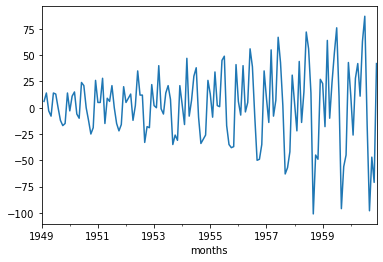

In [23]:
data["first_seasonal_difference"].plot()

In [ ]:
#Let’s perform Augmented Dickey-Fuller Test again to test whether the series is stationary 

In [25]:
test_result1=adfuller(data["first_seasonal_difference"].dropna())

In [26]:
test_result1

(-2.8292668241699874,
 0.05421329028382711,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854085)

In [ ]:
#Now , we can see that the p-value is equal to Significance level of alpha value i.e 0.05. Thus, 
#Null Hypothesis is Rejected and the time series is Stationary.

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

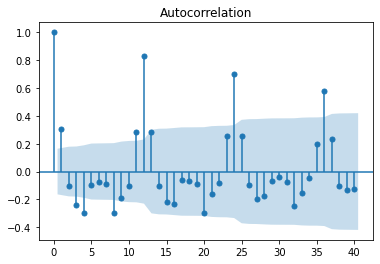

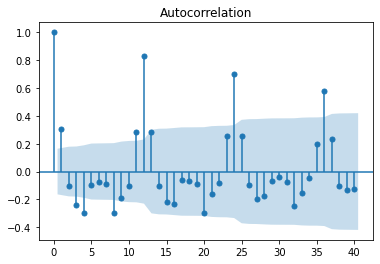

In [32]:
plot_acf(data["first_seasonal_difference"].dropna(),lags=40)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


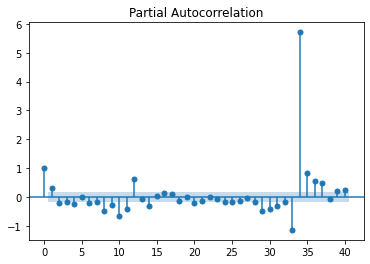

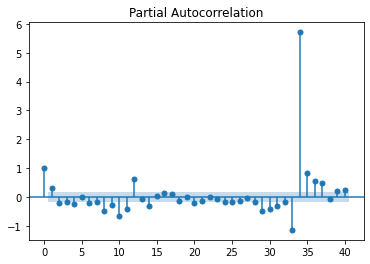

In [33]:
plot_pacf(data["first_seasonal_difference"].dropna(),lags=40)

In [34]:
from statsmodels.tsa.arima_model import ARIMA


In [35]:
model=ARIMA(data["passengers"],order=(1,1,1))

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [36]:
model_fit=model.fit()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [37]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.passengers   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -697.073
Method:                       css-mle   S.D. of innovations             31.338
Date:                Tue, 16 Feb 2021   AIC                           1402.145
Time:                        13:16:46   BIC                           1413.997
Sample:                    02-01-1949   HQIC                          1406.961
                         - 12-01-1960                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.6112      0.228     11.435      0.000       2.164       3.059
ar.L1.D.passengers     0.7400      0.058     12.778      0.000       0.626       0.854
ma.L1.D.passengers    -1.0000      0.019    -53.425      0.000      -1.037      -0.963
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3513           +0.0000j            1.3513            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [40]:
data["forecast"]=model_fit.predict(start=120,end=143)

<AxesSubplot:xlabel='months'>

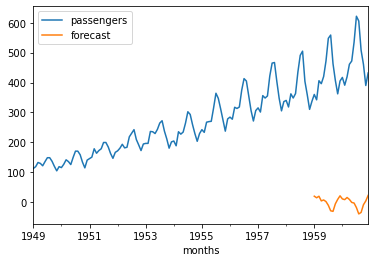

In [41]:
data[['passengers','forecast']].plot()

In [ ]:
#model=ARIMA(data["passengers"],order=(1,1,1))

In [42]:
import statsmodels.api as sm

In [43]:
model=sm.tsa.statespace.SARIMAX(data["passengers"],order=(1,1,1),seasonal_order=(1,1,1,12))

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [44]:
result=model.fit()

In [47]:
data["forecast1"]=result.predict(start=120,end=143)

<AxesSubplot:xlabel='months'>

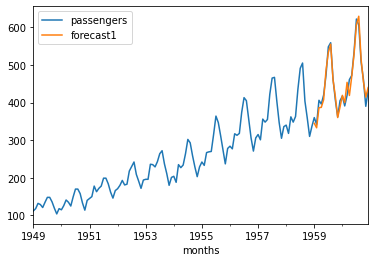

In [48]:
data[['passengers','forecast1']].plot()